# Introduction to Plotting with Seaborn

**IN PROGRESS - FINAL VERSION TO BE PUBLISHED SEPT 29, 2021**

## Learning Objectives
- Be familiar with the use-cases for Seaborn plots
- Generate a varity of plots in Seaborn useful for EDA
- Recognize and appropriately use strategies for visualizing continuous versus categorical data
- Appropriately plot nested data

---

## Introduction

[Seaborn](https://seaborn.pydata.org) is a great Python plotting package that is built on top of Matplotlib. That is, it uses Matplotlib "under the hood", but it offers the user a much simpler API (set of commands) that enable us to generate a variety of great-looking plots that are particularly useful in data science. You can check out Seaboarn's [examples gallery](https://seaborn.pydata.org/examples/index.html) to see some of the cool stuff you can do (including plotting neuroscience data!). Seaborn was written by [Michael Waskom](https://mwaskom.github.io/).

Comparing Seaborn to Matplotlib, you could say that Matplotlib givens you every sharp, hard-to-use tool in the shed, and you have to figure out how to learn them all without chopping off a finger. Fortunatley in data science you aren't likely to lose any fingers, but Seaborn gives you some DIY-friendly power tools to get data science jobs done easily and looking great. 




## Overview of Seaborn Plotting Functions

Seaborn is organized into three categories of plot types, as shown below:

<img src=https://seaborn.pydata.org/_images/function_overview_8_0.png  alt='Seaborn overview' width=500>

*Image source: [seaborn.pydata.org](seaborn.pydata.org)*

You can see that Seaborn's functions are organized around the different types of data, and questions we typically ask of data in data science: the `relpolt` function plots relationships between different (continuous) variables; the `displot` function plots distributions of data (such as histograms), and the`catplot` function.


## Importing the Seaborn package

By convention, the alias we use when importing Seaborn is `sns`.

We'll also be using pandas and a bit of Matplotlib, so we'll import those packages at the same time.

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Plotting Gapminder data

Mostly we'll work with long-format data from here on, but since we have worked with the Gapminder data up until now, let's see how we can generate a plot similar to what we produced in the [Introduction to Plotting with Matplotlib](./plotting) lesson.

First we'll load the Ocieania GDP data, and strip the leading text off column names so that they are just the years:

In [16]:
df = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')
df.columns = df.columns.str.strip('gdpPercap_')

In the previous lesson, we plotted GDP for each country as a function of year. That is, year is on the *x* axis, GDP is on the *y* axis, and there are separate lines for each country. As discussed previously, in this dataset, year is a continuous variable, as is GDP, but country is a categorical variable. 

From the figure of Seaborn plot types above, you can see that `relplot()` is the function to use for relational plots — that is, when you want to show the relationships between two continuous variables (year and GDP in this case).

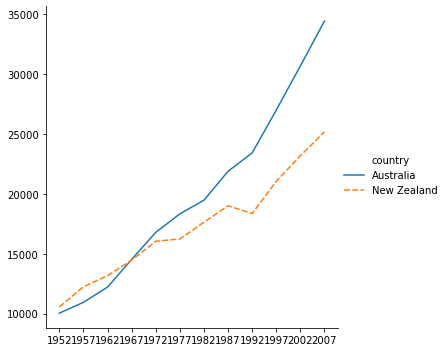

In [17]:
sns.relplot(data=df.T, kind='line')  # For wide-format data we need to transpose rows & columns
plt.show()

### Plotting Long-Format Data